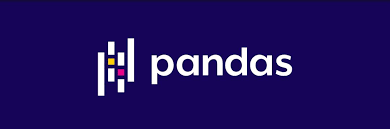

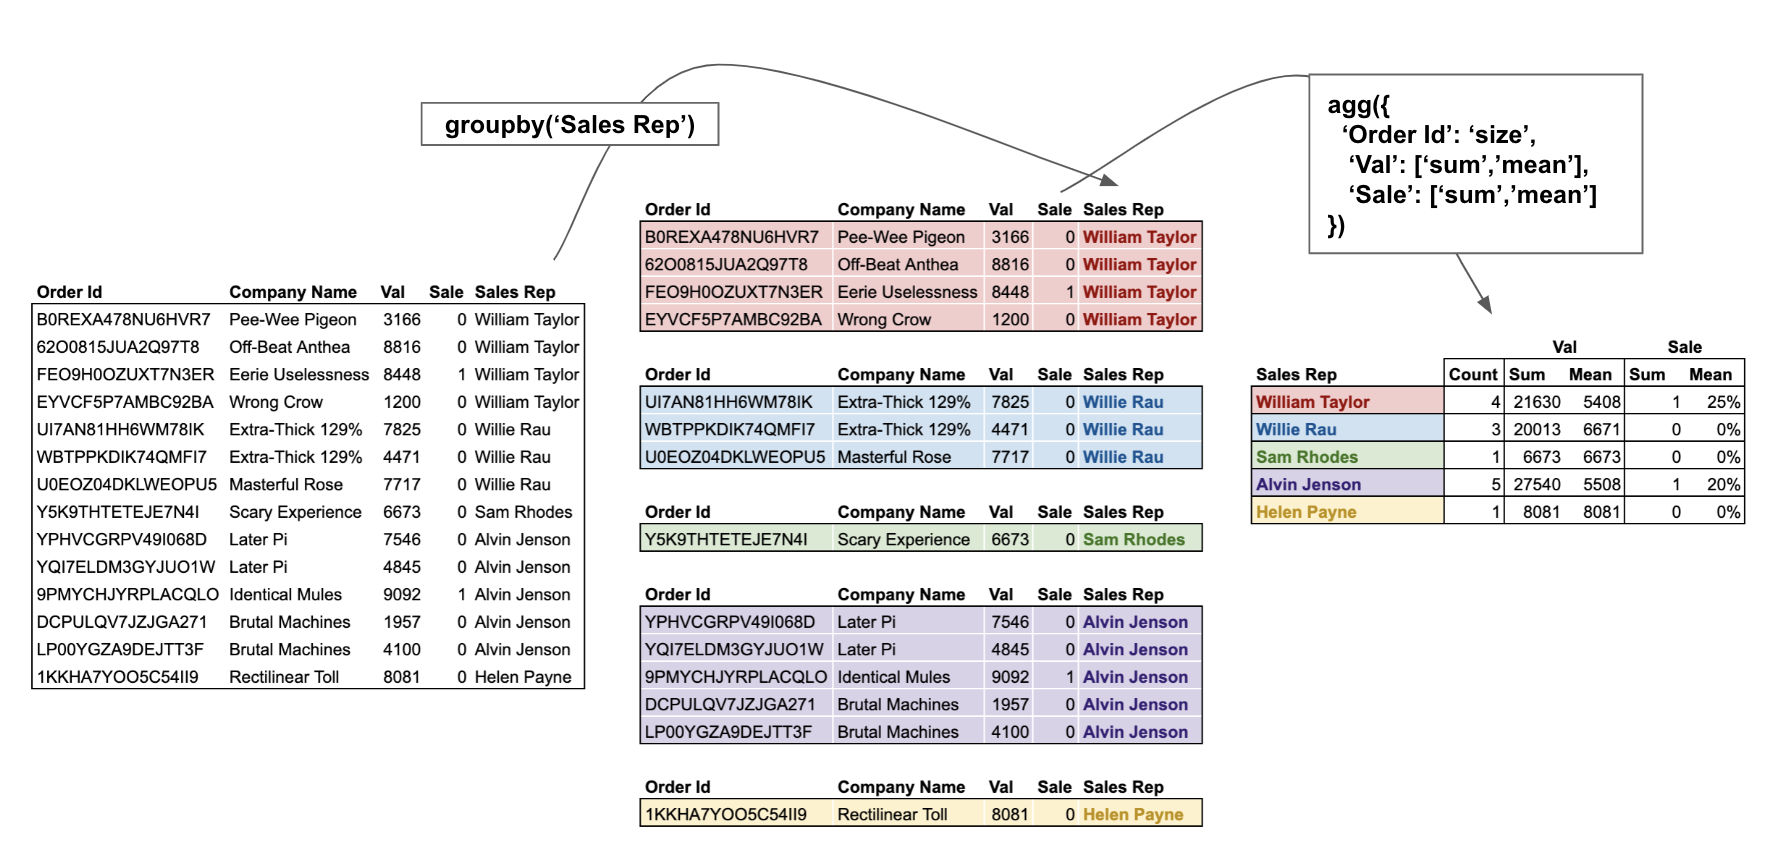

### 판다스는 위 그림처럼 원본 데이터(왼쪽)에서 사용자의 가공을 통해서 정제된 데이터(오른쪽)를 얻기 위한 여러 함수들이 있습니다.
### 이번 시간에는 Pandas 라이브러리에서 많이 쓰이는 함수들을 살펴보겠습니다.

In [1]:
import pandas as pd # 일반적으로 판다스는 pd로 축약하여 불러옵니다

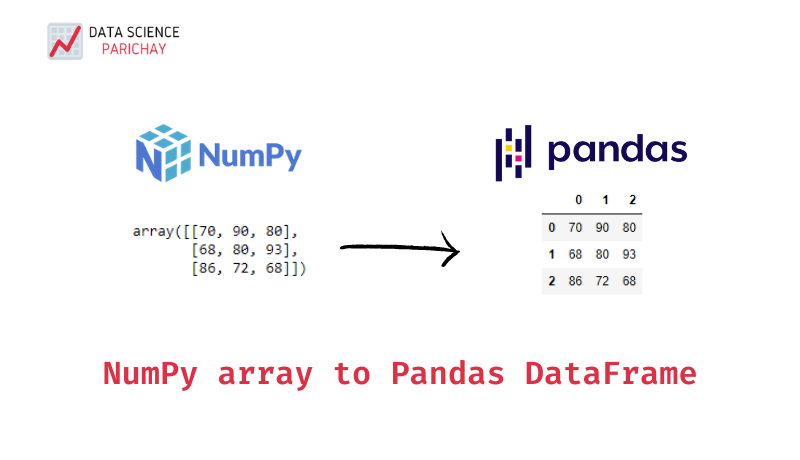

### 위 그림은 Pandas의 기본 구성 요소가 사실은 Numpy array라는 것을 보여주고 있습니다. 따라서 Numpy배열에서 쓰였던 연산의 특징이 pandas에서도 그대로 활용되는 것이 많습니다.

In [2]:
# Numpy 배열에서 활용된 연산이 그대로 판다스에서도 활용이 가능합니다

s1 = pd.Series(range(1, 6), index=list('abcde'))
s2 = pd.Series(range(11, 16), index=list('bcdef'))

print("두 개의 Series를 더하기(방법 1): \n", s1.add(s2))
print("두 개의 Series를 더하기(방법 2): \n", s1+s2)

두 개의 Series를 더하기(방법 1): 
 a     NaN
b    13.0
c    15.0
d    17.0
e    19.0
f     NaN
dtype: float64
두 개의 Series를 더하기(방법 2): 
 a     NaN
b    13.0
c    15.0
d    17.0
e    19.0
f     NaN
dtype: float64


##### 위에 결과를 잘 살펴봅시다
##### 더하기 연산이 된 값은 b,c,d,e 만 더해진 것을 알 수 있습니다. a, f는 더할 수 있는 대상이 없으므로 NaN이라는 결과가 출력되었습니다.

##### DataFrame은 어떻게 될까요?

In [3]:
# DataFrame의 더하기 결과
df1 = pd.DataFrame(np.arange(9).reshape(3, 3), columns=list('abc'))
df1

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [4]:
# DataFrame의 더하기 결과
df2 = pd.DataFrame(np.arange(16).reshape(4, 4), columns=list('abcd'))
df2

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [5]:
df1+df2  # 결과를 보면, 행과 열의 index가 일치하는 경우에만 연산이 된다는 것을 알 수 있습니다.

,a,b,c,d
0,0.0,2.0,4.0,NaN
1,7.0,9.0,11.0,NaN
2,14.0,16.0,18.0,NaN
3,NaN,NaN,NaN,NaN


In [6]:
# 값이 없으면 0으로 대체해서 연산하기
df = df1.add(df2, fill_value=0)
df

,a,b,c,d
0,0.0,2.0,4.0,3.0
1,7.0,9.0,11.0,7.0
2,14.0,16.0,18.0,11.0
3,12.0,13.0,14.0,15.0


In [7]:
# 예제 1
# DataFrame 사칙연산 

# DataFrame의 더하기 결과
df1 = pd.DataFrame(np.arange(27).reshape(3, 9), columns=list('abcdefghi'))
df2 = pd.DataFrame(np.arange(8).reshape(2, 4), columns=list('cdef'))
df1+df2

,a,b,c,d,e,f,g,h,i
0,NaN,NaN,2.0,4.0,6.0,8.0,NaN,NaN,NaN
1,NaN,NaN,15.0,17.0,19.0,21.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


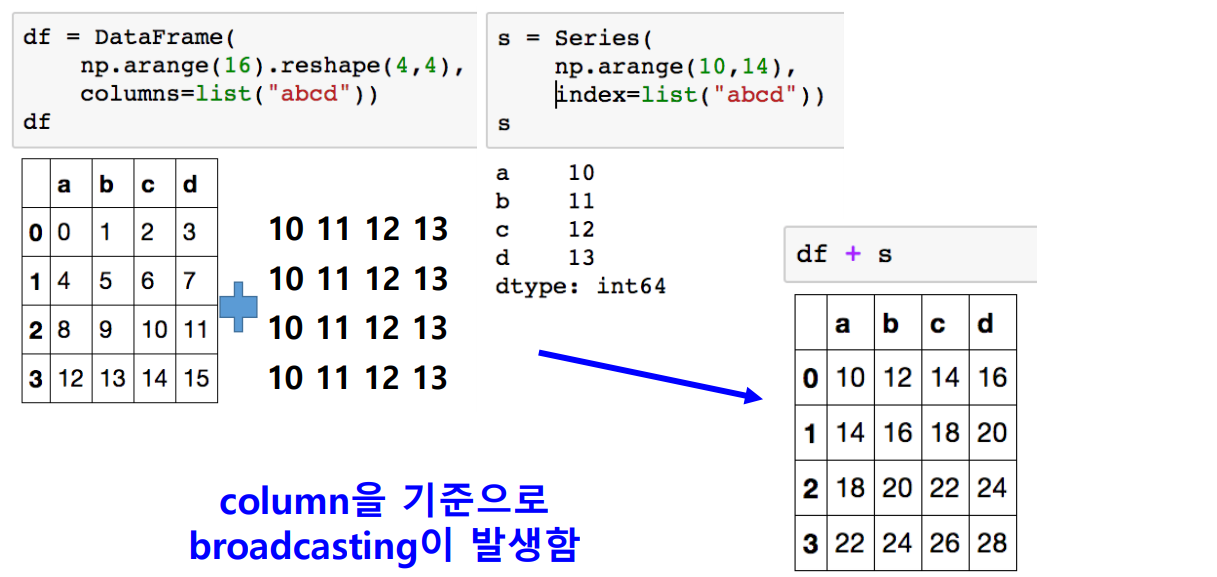

In [8]:
# 위 그림과 같은 Broadcasting을 해보겠습니다.
df = pd.DataFrame(
    np.arange(16).reshape(4,4), 
    columns=list("abcd"))
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [9]:
s = pd.Series(
    np.arange(10,14), 
    index=list("abcd"))
s

a    10
b    11
c    12
d    13
dtype: int64

In [10]:
df + s # 열 index 기준으로 broad casting이 되었다

,a,b,c,d
0,10,12,14,16
1,14,16,18,20
2,18,20,22,24
3,22,24,26,28


In [11]:
s2 = pd.Series(np.arange(10,14))

df.add(s2, axis=0) # 헹 index 기준으로 broad casting이 되었다

,a,b,c,d
0,10,11,12,13
1,15,16,17,18
2,20,21,22,23
3,25,26,27,28


In [12]:
# 예제 2
# Broadcasting 연산해보기

df = pd.DataFrame(
    np.arange(16).reshape(4,4), 
    columns=list("abcd"))

ser = pd.Series(
    np.arange(10,14), 
    index=list("cdef"))
df+ser

,a,b,c,d,e,f
0,NaN,NaN,12.0,14.0,NaN,NaN
1,NaN,NaN,16.0,18.0,NaN,NaN
2,NaN,NaN,20.0,22.0,NaN,NaN
3,NaN,NaN,24.0,26.0,NaN,NaN


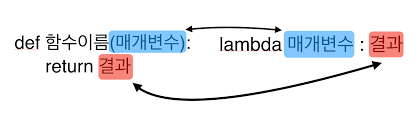

In [13]:
# lambda

# lambda 함수란 아주 기본적인 함수를 미리 정의하여 활용하는 것을 뜻한다 
f = lambda x: 2*x
print(f(3))

f = lambda x,y: x*y
print(f(3,4))

6
12


In [14]:
# 예제 3
# lambda 함수를 활용하여 3개의 숫자를 받아서 모두 더하는 함수를 만드세요
f = lambda x,y,z: x+y+z
f(1,2,3)

6

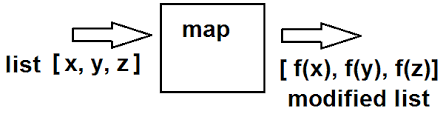

In [15]:
# map 함수 활용하기
list_1 = [1,2,3,4,5]

# lambda 함수에 map을 활용한 것. 변수는 1개만 받도록 정의
f = lambda x: x ** 2
print(list(map(f, list_1)))

# lambda 함수에 map을 활용한 것. 변수는 2개를 받도록 정의
f = lambda x, y: x + y
print(list(map(f, list_1, list_1)))

[1, 4, 9, 16, 25]
[2, 4, 6, 8, 10]


In [16]:
# 예제 4

# map 함수 활용하기
list_1 = [1,2,3]

# lambda 함수에 map을 활용한 것. 변수는 1개만 받도록 정의
f = lambda x: x ** 4
print(list(map(f, list_1)))

[1, 16, 81]


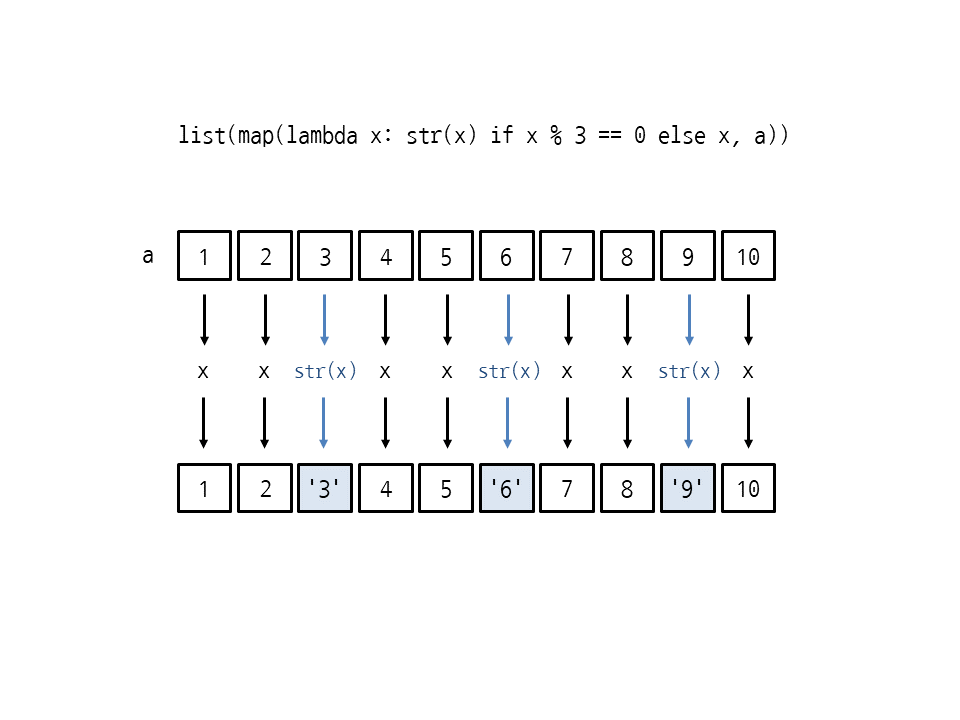

##### 위 그림은 map, lambda 함수를 활용하여 1~10까지의 숫자를 받아서 3의 배수는 문자열로 바꿔주는 함수를 map과 lambda로 표현하였다.

In [17]:
list_1 = [1,2,3,4,5,6,7,8,9,10]
f = lambda x: str(x) if x%3 == 0 else x

print("위 그림의 lambda, map 함수 활용 결과: ", list(map(f, list_1)))

위 그림의 lambda, map 함수 활용 결과:  [1, 2, '3', 4, 5, '6', 7, 8, '9', 10]


In [18]:
# map과 lambda를 활용하여 판다스 데이터를 다룰 수 있습니다
f = lambda x: x**2
ser = pd.Series(np.arange(10))
print("Series 생성 데이터: \n", ser)

# series 데이터는 map이라는 함수를 내장하고 있습니다. (함수 f를 ser의 각 요소에 적용하는 명령어)
print("map으로 변환한 데이터: \n", ser.map(f)) 

Series 생성 데이터: 
 0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
map으로 변환한 데이터: 
 0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64


In [19]:
# 딕셔너리를 활용하여 map으로 series 데이터를 한번에 수정할 수 있습니다

z = {1: 'a', 2: 'b', 3: 'c'} 
print(s1.map(z)) # 1,2,3을 각각 a,b,c으로 바꿈

a      a
b      b
c      c
d    NaN
e    NaN
dtype: object


## Pandas에서 많이 활용되는 명령어 
    
    replace
    : 예를 들어 [100, 200, 100, 300, 400, 500, 100] 이러한 데이터를 다루다보면,
      한번에 100을 800으로 바꾸고 싶을 때가 있을 수 있습니다. 이럴 때 Replace를 활용할 수 있습니다.    
       
    apply
    : 앞서 나왔던 Series에 적용한 map을 DataFrame 단위로 적용하고 싶을 때 활용가능합니다.
    
    describe
    : DataFrame의 각 요소들의 평균값, 표준편차 등의 통계치들을 정리하여 보여줍니다.
    
    isnull
    : 결측치(Null, NaN)가 있으면 True, 없으면 False로 결과값을 주는 함수입니다.
    
    unique
    : DataFrame에서 중복없이 값들을 보고 싶을 때 활용할 수 있습니다.

In [20]:
# 예시 데이터를 불러옵니다.
df = pd.read_csv('https://raw.githubusercontent.com/rstudio/Intro/master/data/wages.csv')
df.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [21]:
# 위에서 sex라는 열에서 male은 1, female은 0으로 바꿔봅니다.

df['sex'] = df['sex'].replace({"male": 0, "female": 1})
df

,earn,height,sex,race,ed,age
0,79571.299011,73.89,0,white,16,49
1,96396.988643,66.23,1,white,16,62
2,48710.666947,63.77,1,white,16,33
3,80478.096153,63.22,1,other,16,95
4,82089.345498,63.08,1,white,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,0,white,12,33
1375,24853.519514,61.31,1,white,18,86
1376,13710.671312,63.64,1,white,12,37
1377,95426.014410,71.65,0,white,12,54


In [22]:
# 딕셔너리가 아닌 리스트로 바꿀 수도 있습니다.

df['sex'] = df['sex'].replace(
                            ['male', 'female'], 
                            [0, 1])
df

,earn,height,sex,race,ed,age
0,79571.299011,73.89,0,white,16,49
1,96396.988643,66.23,1,white,16,62
2,48710.666947,63.77,1,white,16,33
3,80478.096153,63.22,1,other,16,95
4,82089.345498,63.08,1,white,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,0,white,12,33
1375,24853.519514,61.31,1,white,18,86
1376,13710.671312,63.64,1,white,12,37
1377,95426.014410,71.65,0,white,12,54


In [23]:
# 예제 5
# 예시 데이터를 불러옵니다.
df = pd.read_csv('https://raw.githubusercontent.com/rstudio/Intro/master/data/wages.csv')

# race라는 열에서 white는 0, other는 1로 바꾸기
df['race'] = df['race'].replace(
                            ['white', 'other'], 
                            [0, 1])
df

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,0,16,49
1,96396.988643,66.23,female,0,16,62
2,48710.666947,63.77,female,0,16,33
3,80478.096153,63.22,female,1,16,95
4,82089.345498,63.08,female,0,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,male,0,12,33
1375,24853.519514,61.31,female,0,18,86
1376,13710.671312,63.64,female,0,12,37
1377,95426.014410,71.65,male,0,12,54


In [24]:
# DataFrame에서는 applymap함수를 활용하여 "각 열 전체"가 아닌 각각의 원소에 함수를 적용할 수 있습니다

df_info = df[['earn', 'height', 'age']]

f = lambda x: x.max() - x.min() # 각 열의 최대값에서 최소값을 뺀 값

print("earn, height, age의 열에서 각각 최대값에서 최소값을 뺀 값: \n\n", df_info.apply(f))

earn, height, age의 열에서 각각 최대값에서 최소값을 뺀 값: 

 earn      318047.708444
height        19.870000
age           73.000000
dtype: float64


In [25]:
# 앞서 Series에서는 map을 활용했다면 DataFrame에서는 apply함수를 활용하여 "각 열 전체에" 함수를 적용할 수 있습니다

f = lambda x: -x # 모든 요소를 음수로 바꾸기

df_info.applymap(f)

,earn,height,age
0,-79571.299011,-73.89,-49
1,-96396.988643,-66.23,-62
2,-48710.666947,-63.77,-33
3,-80478.096153,-63.22,-95
4,-82089.345498,-63.08,-43
...,...,...,...
1374,-30173.380363,-71.68,-33
1375,-24853.519514,-61.31,-86
1376,-13710.671312,-63.64,-37
1377,-95426.014410,-71.65,-54


In [26]:
# 예제 6
# 예시 데이터를 불러옵니다.
df = pd.read_csv('https://raw.githubusercontent.com/rstudio/Intro/master/data/wages.csv')


# apply라는 함수를 활용하여 height, age열의 평균값에서 각 요소를 뺀 값으로 height, age열을 바꾸기
df_info = df[['height', 'age']]

f = lambda x: x.mean() - x # 각 열의 최대값에서 최소값을 뺀 값

print("height, age열의 평균값에서 각 요소를 뺀 값: \n\n", df_info.apply(f))

height, age열의 평균값에서 각 요소를 뺀 값: 

        height        age
0    -7.29736  -3.671501
1     0.36264 -16.671501
2     2.82264  12.328499
3     3.37264 -49.671501
4     3.51264   2.328499
...       ...        ...
1374 -5.08736  12.328499
1375  5.28264 -40.671501
1376  2.95264   8.328499
1377 -5.05736  -8.671501
1378 -1.62736  14.328499

[1379 rows x 2 columns]


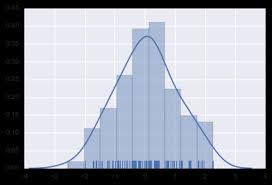

##### 데이터를 다루다보면 위 처럼 표데이터가 아닌 평균 등의 위와 같은 그래프로 표현되는 데이터가 필요할 때가 있습니다. 간단하게 이와 관련된 함수를 알아보겠습니다.

In [27]:
# describe, unique, isnull 
df = pd.read_csv('https://raw.githubusercontent.com/rstudio/Intro/master/data/wages.csv')

df.describe() 

,earn,height,ed,age
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,32446.292622,66.592640,13.354605,45.328499
std,31257.070006,3.818108,2.438741,15.789715
min,-98.580489,57.340000,3.000000,22.000000
25%,10538.790721,63.720000,12.000000,33.000000
50%,26877.870178,66.050000,13.000000,42.000000
75%,44506.215336,69.315000,15.000000,55.000000
max,317949.127955,77.210000,18.000000,95.000000


##### describe는 위처럼 각 통계치를 한눈에 보여줍니다. count는 개수, mean은 평균, std는 표준편차, min, max은 최소,최대값. 25%, 50%, 75%는 각 백분율에 위치하는 값을 보여줍니다.

In [28]:
# unique는 각 열의 고유한 값을 보여줍니다. 
# 아래의 경우, race 열에는 white, other 뿐만아니라, hispanic, black도 있다는 것을 알 수 있습니다.
df['race'].unique()  

array(['white', 'other', 'hispanic', 'black'], dtype=object)

In [29]:
df.isnull().sum() # NaN, Null 값이 있는지 보여줍니다. 현재 데이터는 모든 열에서 결측값이 없다는 것을 알 수 있습니다.

earn      0
height    0
sex       0
race      0
ed        0
age       0
dtype: int64

In [30]:
# 예제 7
# 예시 데이터를 불러옵니다.
df = pd.read_csv('https://raw.githubusercontent.com/rstudio/Intro/master/data/wages.csv')

# ed 열의 unique한 값은 무엇이 있는지 확인해보세요.
df['ed'].unique()

array([16, 17, 15, 12, 14, 11, 13,  9, 10, 18,  8,  5,  6,  7,  4,  3])